# Import Packages

In [2]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [3]:
class_names = ['Doubtful','healthy knee', 'Minimal','moderate','severe']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64)

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [5]:
def load_data():

    datasets = [r'C:\Users\priya\Music\bone cancer\train', r'C:\Users\priya\Music\bone cancer\test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [6]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:\Users\priya\Music\bone cancer\train


100%|██████████| 130/130 [00:00<00:00, 848.75it/s]


Loading C:\Users\priya\Music\bone cancer\test


100%|██████████| 40/40 [00:00<00:00, 812.25it/s]


In [11]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [13]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 5735
Number of testing examples: 520
Each image is of size: (64, 64)


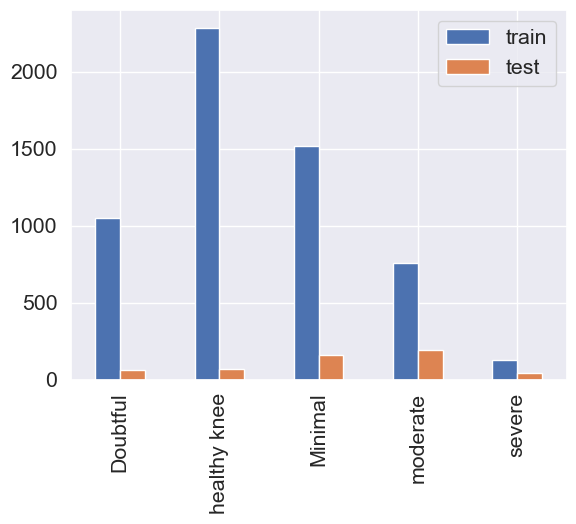

In [15]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

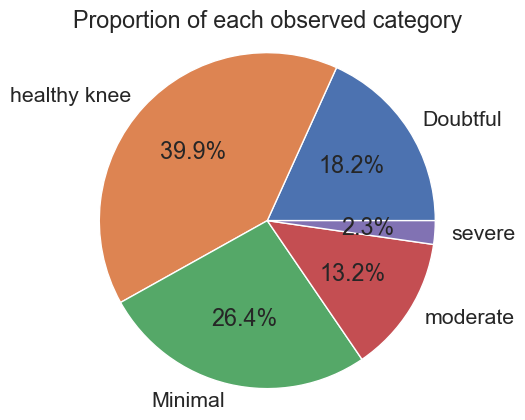

In [17]:
plt.pie(train_counts,
        explode=(0,0,0,0,0) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

## Scale the data

In [20]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Visualize the data
We can display a random image from the training set.

In [23]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

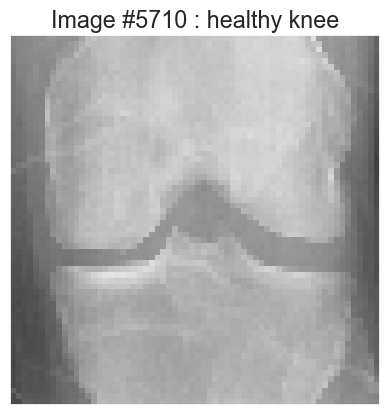

In [25]:
display_random_image(class_names, train_images, train_labels)

In [27]:
import matplotlib.pyplot as plt

def display_examples(class_names, images, labels):
    """
    Display 25 images from the images array with its corresponding labels
    """
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()


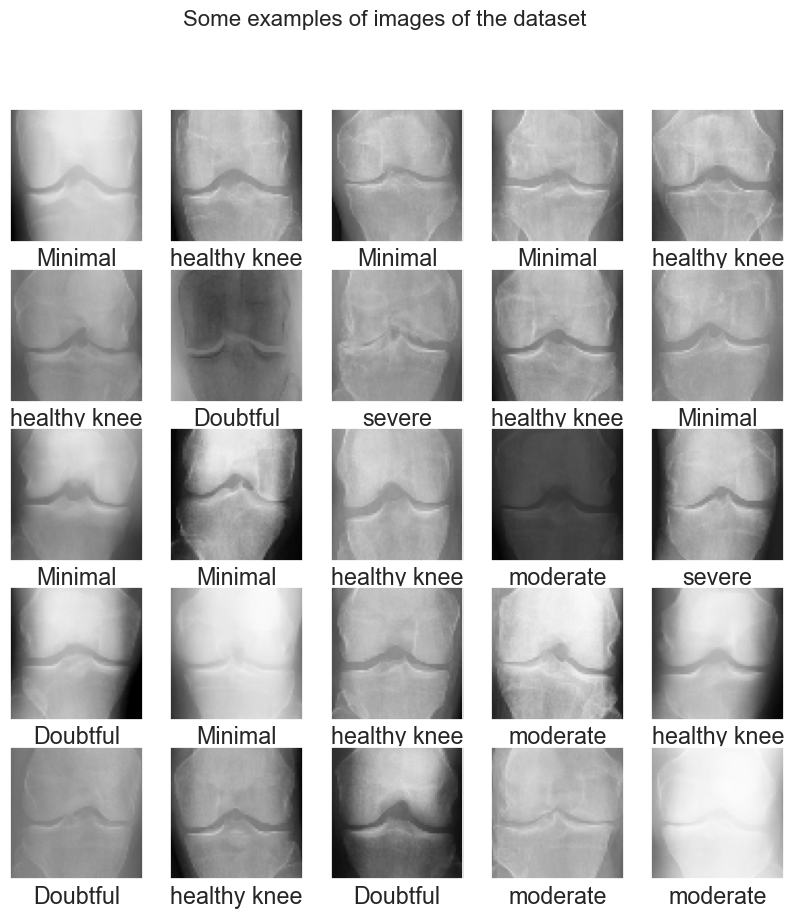

In [29]:
display_examples(class_names, train_images, train_labels)

# CNN

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (64, 64,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

In [34]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=60, validation_split = 0.2)

Epoch 1/60
36/36 [==============================] - 10s 269ms/step - loss: 1.4236 - accuracy: 0.3936 - val_loss: 1.3955 - val_accuracy: 0.3906
Epoch 2/60
36/36 [==============================] - 10s 265ms/step - loss: 1.3939 - accuracy: 0.4037 - val_loss: 1.3930 - val_accuracy: 0.3906
Epoch 3/60
36/36 [==============================] - 10s 270ms/step - loss: 1.3819 - accuracy: 0.4028 - val_loss: 1.3798 - val_accuracy: 0.3915
Epoch 4/60
36/36 [==============================] - 10s 275ms/step - loss: 1.3685 - accuracy: 0.4010 - val_loss: 1.3646 - val_accuracy: 0.4159
Epoch 5/60
36/36 [==============================] - 10s 274ms/step - loss: 1.3501 - accuracy: 0.4104 - val_loss: 1.3410 - val_accuracy: 0.4412
Epoch 6/60
36/36 [==============================] - 10s 267ms/step - loss: 1.3179 - accuracy: 0.4265 - val_loss: 1.3103 - val_accuracy: 0.4403
Epoch 7/60
36/36 [==============================] - 10s 268ms/step - loss: 1.2725 - accuracy: 0.4468 - val_loss: 1.2737 - val_accuracy: 0.4673

In [38]:
test_loss = model.evaluate(test_images, test_labels)

17/17 [==============================] - 0s 13ms/step - loss: 0.5282 - accuracy: 0.8115


In [40]:
####resnet
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

ResNet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(64,64, 3))

In [42]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in ResNet_model.layers[:-15]:
    layer.trainable = False

x = ResNet_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(13, activation='softmax')(x)
model2 = Model(ResNet_model.input, output)


#model2.summary()


In [44]:
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
history = model2.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)  

Epoch 1/20
36/36 [==============================] - 81s 2s/step - loss: 1.4375 - accuracy: 0.4087 - val_loss: 4.2911 - val_accuracy: 0.3112
Epoch 2/20
36/36 [==============================] - 73s 2s/step - loss: 1.1418 - accuracy: 0.5157 - val_loss: 2.3157 - val_accuracy: 0.4106
Epoch 3/20
36/36 [==============================] - 74s 2s/step - loss: 0.9523 - accuracy: 0.5968 - val_loss: 2.1222 - val_accuracy: 0.4464
Epoch 4/20
36/36 [==============================] - 74s 2s/step - loss: 0.7534 - accuracy: 0.6818 - val_loss: 1.7132 - val_accuracy: 0.3984
Epoch 5/20
36/36 [==============================] - 73s 2s/step - loss: 0.5762 - accuracy: 0.7762 - val_loss: 2.4067 - val_accuracy: 0.4525
Epoch 6/20
36/36 [==============================] - 74s 2s/step - loss: 0.4642 - accuracy: 0.8272 - val_loss: 2.1009 - val_accuracy: 0.4612
Epoch 7/20
36/36 [==============================] - 74s 2s/step - loss: 0.3603 - accuracy: 0.8751 - val_loss: 2.2495 - val_accuracy: 0.3845
Epoch 8/20
36/36 [==

In [50]:
test_loss = model2.evaluate(test_images, test_labels)

17/17 [==============================] - 5s 303ms/step - loss: 0.9628 - accuracy: 0.8135


In [52]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import tensorflow as tf

# Define the dimensions of your input images
height = 224
width = 224
channels = 3

# Define the input tensor
input_tensor = Input(shape=(height, width, channels))

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Flatten the output of VGG16
flatten = Flatten()(base_model.output)

# Add a dense layer with some neurons
output = Dense(10, activation='softmax')(flatten)

# Create a new model
model3 = Model(inputs=base_model.input, outputs=output)

# Set all layers as non-trainable initially
for layer in model3.layers:
    layer.trainable = False

# Make the last few layers trainable
for layer in model3.layers[-16:]:
    layer.trainable = True
    print("Layer '%s' is trainable" % layer.name)


Layer 'block2_conv2' is trainable
Layer 'block2_pool' is trainable
Layer 'block3_conv1' is trainable
Layer 'block3_conv2' is trainable
Layer 'block3_conv3' is trainable
Layer 'block3_pool' is trainable
Layer 'block4_conv1' is trainable
Layer 'block4_conv2' is trainable
Layer 'block4_conv3' is trainable
Layer 'block4_pool' is trainable
Layer 'block5_conv1' is trainable
Layer 'block5_conv2' is trainable
Layer 'block5_conv3' is trainable
Layer 'block5_pool' is trainable
Layer 'flatten_2' is trainable
Layer 'dense_5' is trainable


In [54]:
from keras.optimizers import Adam
# from keras.losses import categorical_crossentropy

opt = Adam(learning_rate=0.001)  # Use learning_rate instead of lr
model3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [56]:
# Resize and preprocess train and test sets
train_images_resized = tf.image.resize(train_images, (224, 224))
train_images_resized = preprocess_input(train_images_resized.numpy())

test_images_resized = tf.image.resize(test_images, (224, 224))
test_images_resized = preprocess_input(test_images_resized.numpy())

In [64]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_disease.h5", monitor='val_accuracy', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')


In [66]:
# model3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [68]:
# Resize images to match the model's input shape
# train_images_resized = tf.image.resize(train_images, (224, 224))
# Now, you can use train_images_resized as input to your model
# history = model3.fit(train_images_resized, train_labels, batch_size=128, epochs=20, validation_split=0.2)

history = model3.fit(train_images_resized, train_labels,
                     batch_size=8, epochs=5, validation_split=0.2,
                     callbacks=[checkpoint, early])


Epoch 1/5
574/574 [==============================] - ETA: 0s - loss: 1.4902 - accuracy: 0.3710
Epoch 1: val_accuracy improved from -inf to 0.39058, saving model to vgg16_disease.h5


C:\Users\priya\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


574/574 [==============================] - 1466s 3s/step - loss: 1.4902 - accuracy: 0.3710 - val_loss: 1.3992 - val_accuracy: 0.3906
Epoch 2/5
574/574 [==============================] - ETA: 0s - loss: 1.3904 - accuracy: 0.3982
Epoch 2: val_accuracy did not improve from 0.39058
574/574 [==============================] - 1474s 3s/step - loss: 1.3904 - accuracy: 0.3982 - val_loss: 1.3977 - val_accuracy: 0.3906
Epoch 3/5
574/574 [==============================] - ETA: 0s - loss: 1.3903 - accuracy: 0.4004
Epoch 3: val_accuracy did not improve from 0.39058
574/574 [==============================] - 1805s 3s/step - loss: 1.3903 - accuracy: 0.4004 - val_loss: 1.3938 - val_accuracy: 0.3906
Epoch 4/5
574/574 [==============================] - ETA: 0s - loss: 1.3872 - accuracy: 0.4006
Epoch 4: val_accuracy did not improve from 0.39058
574/574 [==============================] - 1527s 3s/step - loss: 1.3872 - accuracy: 0.4006 - val_loss: 1.3940 - val_accuracy: 0.3906
Epoch 5/5
574/574 [===========

In [72]:
# test_loss = model3.evaluate(test_images, test_labels)

test_loss, test_acc = model3.evaluate(test_images_resized, test_labels)
print(f"VGG16 Model Accuracy: {test_acc * 100:.2f}%")

17/17 [==============================] - 40s 2s/step - loss: 1.7061 - accuracy: 0.1346
VGG16 Model Accuracy: 13.46%


17/17 [==============================] - 1s 13ms/step


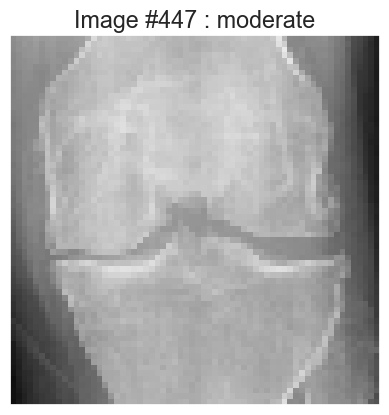

In [74]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability


index = np.random.randint(test_images.shape[0])
plt.figure()
plt.imshow(test_images[index])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

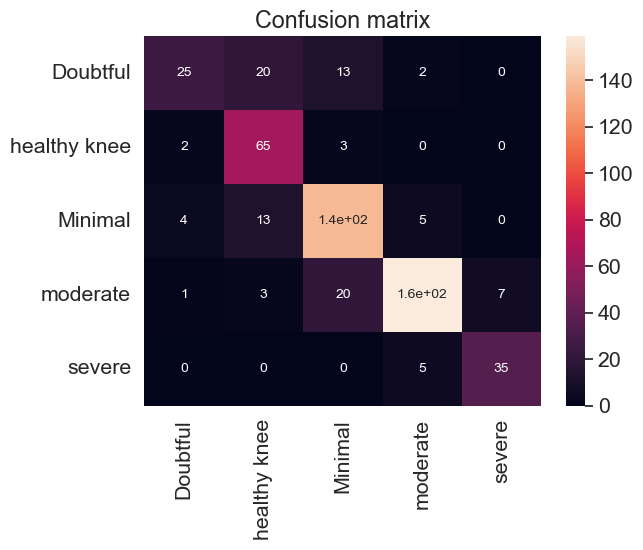

In [76]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [78]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Assuming CM is your confusion matrix, and you have class_names defined

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(test_labels, pred_labels, average='weighted')
overall_recall = recall_score(test_labels, pred_labels, average='weighted')
overall_f1 = f1_score(test_labels, pred_labels, average='weighted')

# Calculate custom accuracy
custom_accuracy = accuracy_score(test_labels, pred_labels)

print(f'Precision: {overall_precision}')
print(f'Recall: {overall_recall}')
print(f'F1 Score: {overall_f1}')
print(f'Custom Accuracy: {custom_accuracy}')

Precision: 0.8246558782204481
Recall: 0.8115384615384615
F1 Score: 0.806837310191349
Custom Accuracy: 0.8115384615384615


In [82]:
# Generate and print classification report
print("\nClassification Report:")
print(classification_report(test_labels, pred_labels, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

    Doubtful       0.78      0.42      0.54        60
healthy knee       0.64      0.93      0.76        70
     Minimal       0.79      0.86      0.83       160
    moderate       0.93      0.84      0.88       190
      severe       0.83      0.88      0.85        40

    accuracy                           0.81       520
   macro avg       0.80      0.78      0.77       520
weighted avg       0.82      0.81      0.81       520



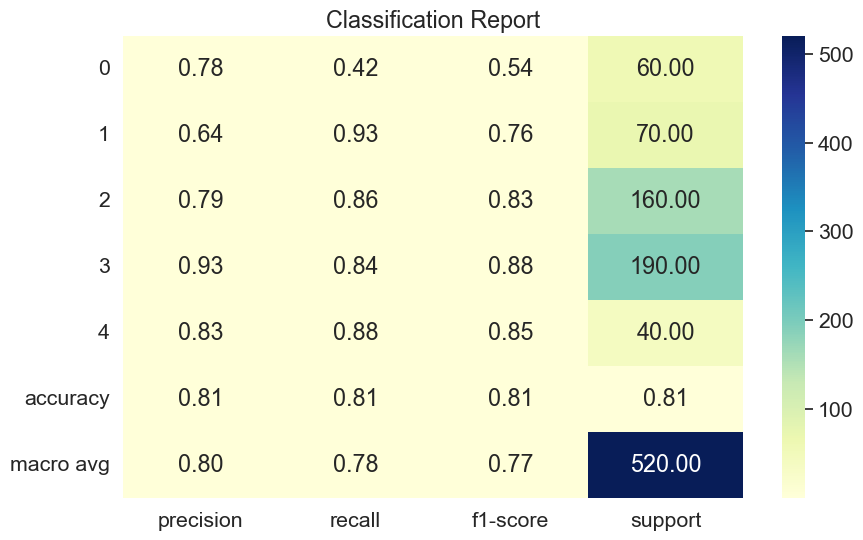

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Assuming test_labels and pred_labels are available

# Generate classification report
report = classification_report(test_labels, pred_labels, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Classification Report')
plt.show()

1/1 [==============================] - 0s 19ms/step


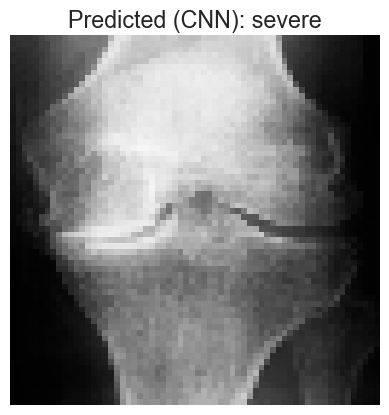

17/17 [==============================] - 0s 13ms/step - loss: 0.5282 - accuracy: 0.8115
CNN Model Accuracy: 81.15%


In [127]:
# Load and preprocess the image
from tensorflow.keras.preprocessing import image

image_path = 'C:\\Users\\priya\\Music\\bone cancer\\test\\severe\\9053047L.png'
img = image.load_img(image_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict using `model`
pred_label = np.argmax(model.predict(img_array))

# Display results
plt.imshow(img)
plt.title(f"Predicted (CNN): {class_names[pred_label]}")
plt.axis("off")
plt.show()

# Model Accuracy
# print(f"CNN Model Accuracy: {model.evaluate(test_images, test_labels)[1] * 100:.2f}%")
cnn_accuracy = model.evaluate(test_images, test_labels)[1] * 100
print(f"CNN Model Accuracy: {cnn_accuracy:.2f}%")

1/1 [==============================] - 0s 61ms/step


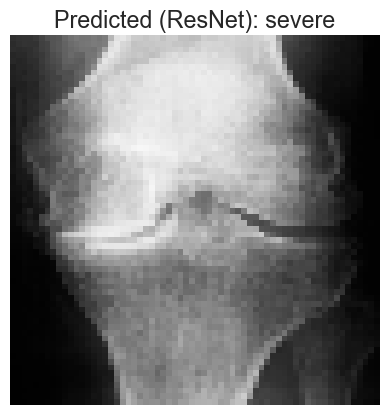

17/17 [==============================] - 5s 316ms/step - loss: 0.9628 - accuracy: 0.8135
ResNet Model Accuracy: 81.35%


In [125]:
pred_label_resnet = np.argmax(model2.predict(img_array))

plt.imshow(img)
plt.title(f"Predicted (ResNet): {class_names[pred_label_resnet]}")
plt.axis("off")
plt.show()

# print(f"ResNet Model Accuracy: {model2.evaluate(test_images, test_labels)[1] * 100:.2f}%")
resnet_accuracy = model2.evaluate(test_images, test_labels)[1] * 100
print(f"ResNet Model Accuracy: {resnet_accuracy:.2f}%")

1/1 [==============================] - 0s 103ms/step


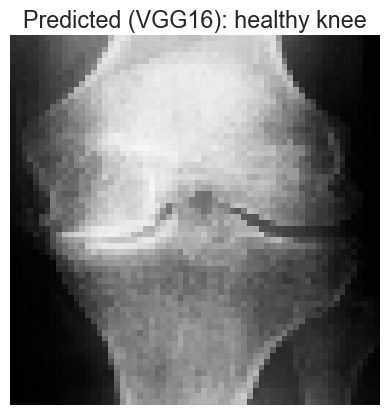

17/17 [==============================] - 41s 2s/step - loss: 1.7061 - accuracy: 0.1346
VGG16 Model Accuracy: 13.46%


In [117]:
#pred_label_vgg = np.argmax(model3.predict(img_array))
# img_preprocessed = preprocess_input(tf.image.resize(img_array, (224, 224)))
# pred_label_vgg = np.argmax(model3.predict(tf.expand_dims(img_preprocessed, axis=0)))

# plt.imshow(img)
# plt.title(f"Predicted (VGG16): {class_names[pred_label_vgg]}")
# plt.axis("off")
# plt.show()

# print(f"VGG16 Model Accuracy: {model3.evaluate(test_images, test_labels)[1] * 100:.2f}%")

img_array = tf.image.resize(img, (224, 224))
img_array = preprocess_input(img_array)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

pred_label_vgg = np.argmax(model3.predict(img_array))
plt.imshow(img)
plt.title(f"Predicted (VGG16): {class_names[pred_label_vgg]}")
plt.axis("off")
plt.show()

_, vgg_accuracy = model3.evaluate(test_images_resized, test_labels, verbose=1)
print(f"VGG16 Model Accuracy: {vgg_accuracy * 100:.2f}%")

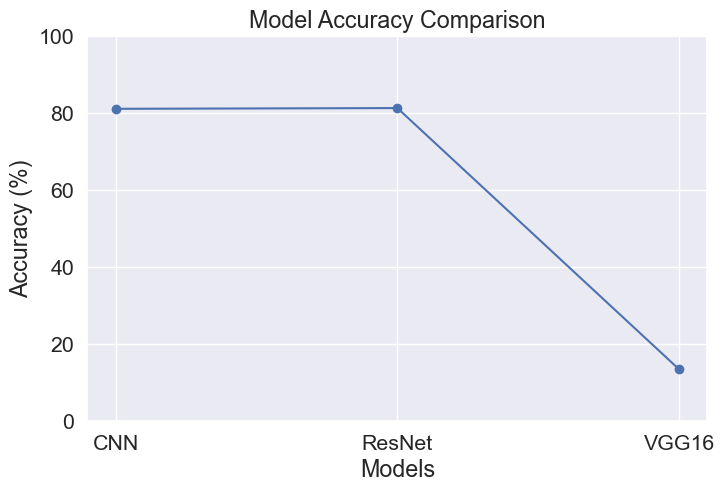

In [139]:
# Comparison of Accuracies
models = ['CNN', 'ResNet', 'VGG16']
accuracies = [cnn_accuracy, resnet_accuracy, vgg_accuracy * 100]

# Line plot
plt.figure(figsize=(8, 5))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')

# Add title and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Set y-axis to range from 0 to 100
plt.grid(True)
plt.show()


# save the model

In [ ]:
model.save_weights("model_dense.weights.h5")
print("Saved model to disk")

In [ ]:
model_json=model.to_json()
with open("model_dense.json", "w") as json_file:
    json_file.write(model_json)